In [1]:
import torch


import processing

import get_data

import matplotlib.pyplot as plt

import numpy as np

import os

In [18]:
# chose the scene 

test_scene = 1  # can be 1,2,3
layers = 8 

In [19]:
# read in the scene

data_folder   = "Data/Set"+str(test_scene)

LF            = get_data.read_lightfield(data_folder)
param_dict    = get_data.read_parameters(data_folder)
depth_map     = get_data.read_depth(data_folder, highres=False)
depth_all_map = get_data.read_all_depths(data_folder, highres=False)

Image: [2, 3]


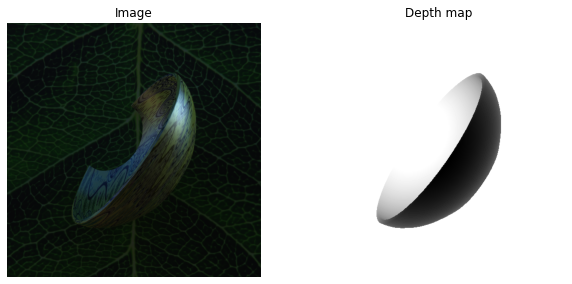

In [20]:
# show one image of the scene with according depth map

x,y = np.random.randint(low=0, high=8, size=(2,))

print('Image:',[x,y])
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(LF[x,y])
axs[0].axis('off')
axs[0].set_title('Image')
axs[1].imshow(depth_all_map[x,y], cmap='gray')
axs[1].axis('off')
axs[1].set_title('Depth map')
plt.show()

In [21]:
# convert the data to torch tensors

images     = torch.from_numpy(LF).permute([0,1,4,2,3]).float()/255.
depth_maps = torch.from_numpy(depth_all_map)

In [28]:
# calculate the psv for the image from before

disp_tensor, min_disp, bin_size = processing.create_disp_tensor(depth_maps[x,y], layers)
psv = processing.create_psv(images[x,y], disp_tensor, layers)

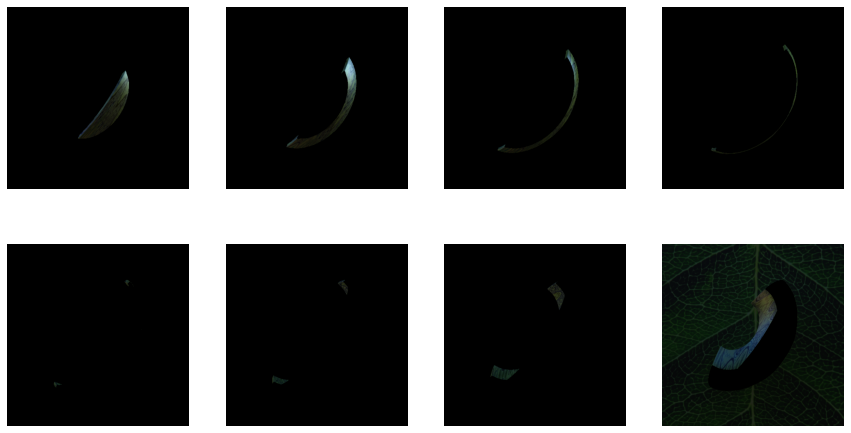

In [30]:
# visualize the PSV

a=int(layers/4)
fig, axs = plt.subplots(a, 4, figsize=(15,8))
for j in range(a):
    for i in range(4):
        img = psv[:,:,:,i+4*j].permute(1,2,0).numpy()
        axs[j,i].imshow(img)
        axs[j,i].axis('off')